In [1]:

from Data_Preparation import *
#from Data_Preparation2 import *
from IPython.display import Markdown, display


def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [2]:

import pandas as pd
import matplotlib.cm as cm


def plot_multi_dimensional_time_series(dfs):
    """
    Plots a multi-dimensional time series DataFrame.
    
    Parameters:
    dfs (list of pd.DataFrame): The list of DataFrames containing the time series data. Each column is a feature.
    
    Returns:
    None
    """
    # Reset index of each DataFrame
    for df in dfs:
        df.reset_index(inplace=True, drop=True)
    
    # Define the columns to plot
    columns_to_plot = ['speed', 'acceleration_est_1', 'angular_acc']
    
    # Get unique groups
    unique_groups = [1,2,3,4,5,6,0,-1,7,8,9,10]
    
    # Create a colormap
    colors = cm.get_cmap('viridis', len(unique_groups))
    
    # Plot each column
    for column in columns_to_plot:
        plt.figure(figsize=(12, 6))
        
        # Set to keep track of groups already plotted for the legend
        plotted_groups = set()
        
        for df in dfs:
            groups = df['group'].unique()
            for group in groups:
                group_df = df[df['group'] == group]
                color = colors(group + 1)  # Group values are assumed to be 1 to 6
                
                if group not in plotted_groups:
                    plt.plot(group_df.index, group_df[column], label=f'Group {group}', color=color)
                    plotted_groups.add(group)
                else:
                    plt.plot(group_df.index, group_df[column], color=color)
        
        plt.xlabel('Row Number')
        plt.ylabel('Value')
        plt.title(column)
        plt.legend()
        plt.grid(True)
        plt.show()


In [3]:
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [4]:
drives_hours = {1:[7,8,9,10,19,20,21,22,23],2:[11,12,13,14,15,16,17,18],3:[0,1,2,3,4,5,6]}

In [5]:
# dir_path = "/bigdata/users-home/dor/transportation research/agg_data/env_ts"

# # Create the directory structure
# os.makedirs(dir_path, exist_ok=True)

In [6]:
directory_d='/data/inputs/Year_Data/DRIVES'
directory_g='/data/inputs/Year_Data/GPS'

In [7]:
def split_list(lst, n):
    return [lst[i::n] for i in range(n)]

In [8]:
# for year in ['2018','2019']:

#     for month in range(1,13,1): 



#             if len(str(month))==1:
#                 # Create the path for the year and month
#                 year_path_d = os.path.join(directory_d, str(year))
#                 month_path_d = os.path.join(year_path_d, '0'+str(month))
#                 year_path_g = os.path.join(directory_g, str(year))
#                 month_path_g = os.path.join(year_path_g, '0'+str(month))
#             else:
#                 year_path_d = os.path.join(directory_d, str(year))
#                 month_path_d = os.path.join(year_path_d, str(month))
#                 year_path_g = os.path.join(directory_g, str(year))
#                 month_path_g = os.path.join(year_path_g, str(month))

#             # List all the day folders
#             days = os.listdir(month_path_d)
#             final_df_dict = {}
#             # List to store the DataFrames
#             dfs_d = []
#             dfs_g = []
#             coor_fixed = []
#             splitted_days = split_list(days, 5)

#             for days_batch in splitted_days:
#                 coor_dict = {}
#                 if os.path.exists(f"/bigdata/users-home/dor/transpotation research/agg_data/env_ts/{month}_{year}__{days_batch}.pickle"):
#                     continue
#                 else:
#                     for day in days_batch:
#                         print(f'processing {day} out of days in {month}/{year}/{days_batch}')

#                         try:
#                             day_path_d = os.path.join(month_path_d, day)
#                             day_path_g = os.path.join(month_path_g, day)

#                             # List all the CSV files in the day folder
#                             try:
#                                 csv_files_d = [f for f in os.listdir(day_path_d) if f.endswith('.csv.gz')][0]
#                                 csv_files_d = os.path.join(day_path_d, csv_files_d)
#                                 df_drives = pd.read_csv(csv_files_d)
#                             except:
#                                 lst = []
#                                 csv_files_d = [f for f in os.listdir(day_path_d)]

#                                 # Iterate over CSV files
#                                 for path in csv_files_d:
#                                     csv_dd = os.path.join(day_path_d, path)
#                                     csv_d = [f for f in os.listdir(csv_dd) if f.endswith('.csv.gz')][0]
#                                     csv_dd = os.path.join(csv_dd, csv_d)
#                                     lst.append(pd.read_csv(csv_dd))
#                                 df_drives = pd.concat(lst, ignore_index=True)

#                             try:
#                                 csv_files_g = [f for f in os.listdir(day_path_g) if f.endswith('.csv.gz')][0]
#                                 csv_files_g = os.path.join(day_path_g, csv_files_g)
#                                 df_gps = pd.read_csv(csv_files_g)
#                             except:
#                                 lst = []
#                                 csv_files_g = [f for f in os.listdir(day_path_g)]

#                                 # Iterate over CSV files
#                                 for path in csv_files_g:
#                                     csv_gg = os.path.join(day_path_g, path)
#                                     csv_g = [f for f in os.listdir(csv_gg) if f.endswith('.csv.gz')][0]
#                                     csv_gg = os.path.join(csv_gg, csv_g)
#                                     lst.append(pd.read_csv(csv_gg))
#                                 df_gps = pd.concat(lst, ignore_index=True)
#                         except:
#                             continue

#                         df_gps.columns = df_gps.columns.str.lower()

#                         df_gps['orig_time'] = pd.to_datetime(df_gps['orig_time'])

#                         df_gps = df_gps.sort_values(by=['vehicle_id', 'orig_time']) 
                        
#                         df_indices = []


#                         # Iterate over DataFrame rows with tqdm for progress indication
#                         for i, row in tqdm(df_gps.iterrows(), total=len(df_gps), desc="Processing rows"):
#                             try:
#                                 if row.speed == 0 and df_gps.loc[i + 1].speed != 0:
#                                     curr = df_gps[df_gps.index.isin(df_indices)]
#                                     for h in drives_hours:
#                                         if int(curr.iloc[0]['orig_time'].hour) in drives_hours[h]:
#                                             group_hour = h
#                                     curr_tuple = (len(curr), curr.iloc[0]['road_speed'],group_hour)

#                                     coor_dict[curr_tuple] = coor_dict.get(curr_tuple,[])
#                                     coor_dict[curr_tuple].append(curr)


#                                     df_indices = []

#                             except:
#                                 continue
#                             df_indices.append(i)
                 





#                     file_path = f"/bigdata/users-home/dor/transpotation research/agg_data/env_ts/{month}_{year}__{days_batch}.pickle"
#                     with open(file_path, "wb") as file:
#                         pickle.dump(coor_dict, file)

In [5]:
import os
import pickle

# Define the directory path
dir_path = "/bigdata/users-home/dor/transpotation research/agg_data/env_ts/ts_with_features/"

# Function to fetch all pickle files in each subdirectory
def fetch_pickle_files_in_subdirs(directory):
    pickl_dict = {}
    # Iterate over all directories in the given directory
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        
        # Ensure that we are only processing directories
        if os.path.isdir(subdir_path):
            pickle_files = [f for f in os.listdir(subdir_path) if f.endswith('.pickle')]
            
            # Print all the pickle files found in the subdirectory
            if pickle_files:
                print(f"Pickle files in '{subdir}':")
                pickl_dict[subdir] = {}
                for pickle_file in pickle_files:
                    full_path = os.path.join(subdir_path, pickle_file)
                    with open(full_path, 'rb') as handle:
                        pickl_dict[subdir][pickle_file] = pickle.load(handle)
                    
            else:
                print(f"No pickle files found in '{subdir}'.")
    return pickl_dict

# Call the function to fetch pickle files
p_dict = fetch_pickle_files_in_subdirs(dir_path)


Pickle files in '(16, 50.0, 3)':
Pickle files in '(12, 50.0, 3)':
Pickle files in '(15, 50.0, 1)':
Pickle files in '(20, 50.0, 2)':
Pickle files in '(14, 50.0, 1)':
Pickle files in '(8, 50.0, 2)':
Pickle files in '(6, 50.0, 3)':
Pickle files in '(8, 70.0, 2)':
Pickle files in '(7, 50.0, 3)':
Pickle files in '(12, 50.0, 2)':
Pickle files in '(17, 50.0, 2)':
Pickle files in '(15, 50.0, 3)':
Pickle files in '(13, 50.0, 1)':
Pickle files in '(10, 50.0, 3)':
Pickle files in '(9, 50.0, 2)':
Pickle files in '(20, 50.0, 1)':
Pickle files in '(11, 50.0, 3)':
Pickle files in '(6, 50.0, 2)':
Pickle files in '(11, 50.0, 1)':
Pickle files in '(21, 50.0, 2)':
Pickle files in '(8, 50.0, 1)':
Pickle files in '(7, 50.0, 1)':
Pickle files in '(10, 50.0, 1)':
Pickle files in '(9, 50.0, 3)':
Pickle files in '(21, 50.0, 1)':
Pickle files in '(15, 50.0, 2)':
Pickle files in '(11, 50.0, 2)':
Pickle files in '(14, 50.0, 2)':
Pickle files in '(17, 50.0, 1)':
Pickle files in '(7, 50.0, 2)':
Pickle files in '(16

In [6]:
len(p_dict['(16, 50.0, 3)'])

45

In [6]:
for group1 in p_dict:
    for group2 in p_dict[group1]:
        temp_lst = []
        for group3 in p_dict[group1][group2]:
            print(group1,group2,len(p_dict[group1][group2][group3]))
            p_dict[group1][group2] = p_dict[group1][group2][group3]

(16, 50.0, 3) 4_2018__['02', '29', '11', '09', '22', '15'].pickle 2580
(16, 50.0, 3) 8_2018__['02', '29', '11', '09', '03', '27'].pickle 1973
(16, 50.0, 3) 6_2018__['26', '13', '05', '18', '04', '30'].pickle 2557
(16, 50.0, 3) 6_2018__['23', '20', '14', '07', '06', '10'].pickle 2535
(16, 50.0, 3) 4_2018__['12', '21', '01', '24', '03', '27'].pickle 1750
(16, 50.0, 3) 9_2018__['26', '13', '05', '18', '04', '30'].pickle 2231
(16, 50.0, 3) 7_2018__['12', '21', '01', '24', '31', '06', '10'].pickle 2727
(16, 50.0, 3) 1_2018__['28', '16', '25', '08', '04', '30'].pickle 2182
(16, 50.0, 3) 6_2018__['28', '16', '25', '08', '17', '19'].pickle 2479
(16, 50.0, 3) 6_2018__['02', '29', '11', '09', '22', '15'].pickle 1937
(16, 50.0, 3) 3_2018__['28', '16', '25', '08', '04', '30'].pickle 1778
(16, 50.0, 3) 2_2018__['12', '21', '11', '09', '22', '15'].pickle 2388
(16, 50.0, 3) 3_2018__['23', '20', '14', '07', '17', '19'].pickle 1621
(16, 50.0, 3) 8_2018__['12', '21', '01', '24', '31', '06', '10'].pickle

(15, 50.0, 1) 6_2018__['12', '21', '01', '24', '03', '27'].pickle 5909
(15, 50.0, 1) 5_2018__['02', '29', '11', '09', '03', '27'].pickle 5390
(15, 50.0, 1) 1_2018__['02', '29', '11', '09', '03', '27'].pickle 369
(15, 50.0, 1) 8_2018__['28', '16', '25', '08', '04', '30'].pickle 4291
(15, 50.0, 1) 8_2018__['26', '13', '05', '18', '22', '15'].pickle 4903
(15, 50.0, 1) 4_2018__['26', '13', '05', '18', '04', '30'].pickle 5552
(15, 50.0, 1) 2_2018__['02', '13', '05', '18', '04', '19'].pickle 4426
(15, 50.0, 1) 8_2018__['23', '20', '14', '07', '17', '19'].pickle 4830
(15, 50.0, 1) 9_2018__['23', '20', '14', '07', '06', '10'].pickle 6469
(15, 50.0, 1) 7_2018__['23', '20', '14', '07', '17', '19'].pickle 5401
(15, 50.0, 1) 4_2018__['23', '20', '14', '07', '06', '10'].pickle 4076
(15, 50.0, 1) 7_2018__['26', '13', '05', '18', '22', '15'].pickle 6028
(15, 50.0, 1) 3_2018__['02', '29', '11', '09', '03', '27'].pickle 4938
(15, 50.0, 1) 3_2018__['26', '13', '05', '18', '22', '15'].pickle 5071
(15, 50

(6, 50.0, 2) 6_2018__['28', '16', '25', '08', '17', '19'].pickle 22545
(6, 50.0, 2) 6_2018__['02', '29', '11', '09', '22', '15'].pickle 17070
(6, 50.0, 2) 3_2018__['28', '16', '25', '08', '04', '30'].pickle 19040
(6, 50.0, 2) 2_2018__['12', '21', '11', '09', '22', '15'].pickle 23467
(6, 50.0, 2) 3_2018__['23', '20', '14', '07', '17', '19'].pickle 18513
(6, 50.0, 2) 8_2018__['12', '21', '01', '24', '31', '06', '10'].pickle 26143
(6, 50.0, 2) 5_2018__['12', '21', '01', '24', '31', '06', '10'].pickle 29739
(6, 50.0, 2) 2_2018__['23', '01', '24', '03', '27'].pickle 9940
(6, 50.0, 2) 3_2018__['12', '21', '01', '24', '31', '06', '10'].pickle 18716
(6, 50.0, 2) 1_2018__['26', '13', '05', '18', '22', '15'].pickle 13467
(6, 50.0, 2) 5_2018__['28', '16', '25', '08', '04', '30'].pickle 22359
(6, 50.0, 2) 2_2018__['26', '16', '25', '08', '17', '10'].pickle 18500
(6, 50.0, 2) 9_2018__['12', '21', '01', '24', '03', '27'].pickle 15588
(6, 50.0, 2) 2_2018__['28', '20', '14', '07', '06'].pickle 17309
(

In [11]:
p_dict[group1].keys()

dict_keys(["4_2018__['02', '29', '11', '09', '22', '15'].pickle", "8_2018__['02', '29', '11', '09', '03', '27'].pickle", "6_2018__['26', '13', '05', '18', '04', '30'].pickle", "6_2018__['23', '20', '14', '07', '06', '10'].pickle", "4_2018__['12', '21', '01', '24', '03', '27'].pickle", "9_2018__['26', '13', '05', '18', '04', '30'].pickle", "7_2018__['12', '21', '01', '24', '31', '06', '10'].pickle", "1_2018__['28', '16', '25', '08', '04', '30'].pickle", "6_2018__['28', '16', '25', '08', '17', '19'].pickle", "6_2018__['02', '29', '11', '09', '22', '15'].pickle", "3_2018__['28', '16', '25', '08', '04', '30'].pickle", "2_2018__['12', '21', '11', '09', '22', '15'].pickle", "3_2018__['23', '20', '14', '07', '17', '19'].pickle", "8_2018__['12', '21', '01', '24', '31', '06', '10'].pickle", "5_2018__['12', '21', '01', '24', '31', '06', '10'].pickle", "2_2018__['23', '01', '24', '03', '27'].pickle", "3_2018__['12', '21', '01', '24', '31', '06', '10'].pickle", "1_2018__['26', '13', '05', '18', '2

In [7]:
import random

def get_random_100(original_list):
    # Ensure the list has at least 100 elements to sample from
    
    
    return random.sample(original_list, 25)


In [22]:
for key in result['clusters']:
    for series in result['clusters'][key]:
        series['group'] = key


In [8]:
for series in p_dict[group1]["4_2018__['02', '29', '11', '09', '22', '15'].pickle"]:
    
#     series.reset_index(inplace=True)

In [22]:
len(p_dict[group1]["4_2018__['02', '29', '11', '09', '22', '15'].pickle"])

10047

In [ ]:

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean, cosine
from fastdtw import fastdtw
from collections import defaultdict

# Function to calculate DTW distances between all pairs of time series
def compute_dtw_distance_matrix(time_series_list, metric='euclidean'):
    n = len(time_series_list)
    distance_matrix = np.zeros((n, n))
    cols = ['speed','acceleration_est_1','angular_acc']
    cols = ['angular_acc']
    # Iterate over all pairs of time series
    for i in range(n):
        for j in range(i+1, n):  # Compute only upper triangle (symmetric)
            if metric == 'euclidean':
                dist, _ = fastdtw(time_series_list[i][cols], time_series_list[j][cols], dist=euclidean)
            elif metric == 'cosine':
                dist, _ = fastdtw(time_series_list[i][cols], time_series_list[j][cols], dist=cosine)
            else:
                raise ValueError("Invalid metric! Use 'euclidean' or 'cosine'.")
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist  # Symmetric
    return distance_matrix

# Function to find optimal number of clusters using silhouette score
def optimal_clusters(distance_matrix, clustering_func, max_clusters=10):
    best_score = -1
    best_n_clusters = 2
    best_model = None
    
    for n_clusters in range(2, max_clusters + 1):
        model = clustering_func(n_clusters)
        labels = model.fit_predict(distance_matrix)
        if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
            score = silhouette_score(distance_matrix, labels, metric='precomputed')
            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
                best_model = model
    
    return best_model, best_n_clusters

# Function to perform clustering with DBSCAN, KMeans, GMM, K-Medoids
def cluster_with_dtw(time_series_list, metric='euclidean', eps=10, min_samples=2, max_clusters=10):
    # Step 1: Compute the distance matrix using DTW
    dtw_distance_matrix = compute_dtw_distance_matrix(time_series_list, metric=metric)
    
    # Step 2: DBSCAN Clustering
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    dbscan_labels = dbscan_model.fit_predict(dtw_distance_matrix)
    
    # Step 3: KMeans Clustering
#     kmeans_model, kmeans_n_clusters = optimal_clusters(dtw_distance_matrix, lambda n: KMeans(n_clusters=n, random_state=42), max_clusters)
#     kmeans_labels = kmeans_model.labels_
    
    # Step 4: GMM Clustering
    gmm_model, gmm_n_clusters = optimal_clusters(dtw_distance_matrix, lambda n: GaussianMixture(n_components=n, random_state=42), max_clusters)
    gmm_labels = gmm_model.predict(dtw_distance_matrix)
    


    # Step 5: K-Medoids Clustering
#     kmedoids_model, kmedoids_n_clusters = optimal_clusters(dtw_distance_matrix, lambda n: KMedoids(n_clusters=n, metric='precomputed', random_state=42), max_clusters)
#     kmedoids_labels = kmedoids_model.labels_
#     if kmedoids_model is None:
#         print("K-Medoids fitting failed!")
#     else:
#         kmedoids_labels = kmedoids_model.labels_
    # Step 6: Gather cluster results and count common series
    def gather_clusters(labels, time_series_list):
        clusters = defaultdict(list)
        for idx, label in enumerate(labels):
            clusters[label].append(time_series_list[idx])
        return clusters
    
    dbscan_clusters = gather_clusters(dbscan_labels, time_series_list)
#     kmeans_clusters = gather_clusters(kmeans_labels, time_series_list)
    gmm_clusters = gather_clusters(gmm_labels, time_series_list)
#     kmedoids_clusters = gather_clusters(kmedoids_labels, time_series_list)
    
    # Step 7: Compare clusters across algorithms
#     def count_common_series(clusters_1, clusters_2):
#     common_series = 0
#     for cluster_1 in clusters_1.values():
#         for cluster_2 in clusters_2.values():
#             # Compare by the index of DataFrames instead of DataFrame objects
#             common_series += len(set(df.index[0] for df in cluster_1).intersection(df.index[0] for df in cluster_2))
#     return common_series

    
#     common_kmeans_gmm = count_common_series(kmeans_clusters, gmm_clusters)
#     common_kmeans_kmedoids = count_common_series(kmeans_clusters, kmedoids_clusters)
#     common_gmm_kmedoids = count_common_series(gmm_clusters, kmedoids_clusters)
    
    # Step 8: Summary table"
    summary_table = {
        'DBSCAN': len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0),
#         'KMeans': kmeans_n_clusters,
        'GMM': gmm_n_clusters,
#         'KMedoids': kmedoids_n_clusters,
#         'Common KMeans-GMM': common_kmeans_gmm,
#         'Common KMeans-KMedoids': common_kmeans_kmedoids,
#         'Common GMM-KMedoids': common_gmm_kmedoids,
    }
    
    return {
        'summary_table': summary_table,
        'dbscan_model': dbscan_model,
#         'kmeans_model': kmeans_model,
        'gmm_model': gmm_model,
#         'kmedoids_model': kmedoids_model,
        'dbscan_clusters': dbscan_clusters,
#         'kmeans_clusters': kmeans_clusters,
        'gmm_clusters': gmm_clusters
#         'kmedoids_clusters': kmedoids_clusters
    }

# Example usage
# time_series_list = [...]  # Your list of time series, each time series is an iterable
df_lst = []
for group in p_dict:
    file_path = f"/bigdata/users-home/dor/transpotation research/agg_data/env_ts/ts_with_features/{group}"
    # Check if the 'cluster_dict' file exists in the directory
    if not os.path.exists(os.path.join(file_path, 'cluster_dict')):
        for key in p_dict[group]:
            df_lst += get_random_100(p_dict[group][key])

        result = cluster_with_dtw(df_lst, metric='euclidean', eps=0.5, min_samples=2)

        with open(os.path.join(file_path,'cluster_dict'), "wb") as file:
            pickle.dump(result, file)
    
    
print("Summary Table:", result['summary_table'])


  File "/home/dor/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
  File "/home/dor/anaconda3/lib/python3.9/subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/home/dor/anaconda3/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/home/dor/anaconda3/lib/python3.9/subprocess.py", line 1754, in _execute_child
    self.pid = _posixsubprocess.fork_exec(


In [72]:
# lst = []
# for key in result['dbscan_clusters']:
#     for series in result['dbscan_clusters'][key]:
#         series['group'] = key
#     lst+=result['dbscan_clusters'][key]

# plot_multi_dimensional_time_series(lst)

In [73]:
# lst = []
# for key in result['kmeans_clusters']:
#     for series in result['kmeans_clusters'][key]:
#         series['group'] = key
#     lst+=result['kmeans_clusters'][key]

# plot_multi_dimensional_time_series(lst)

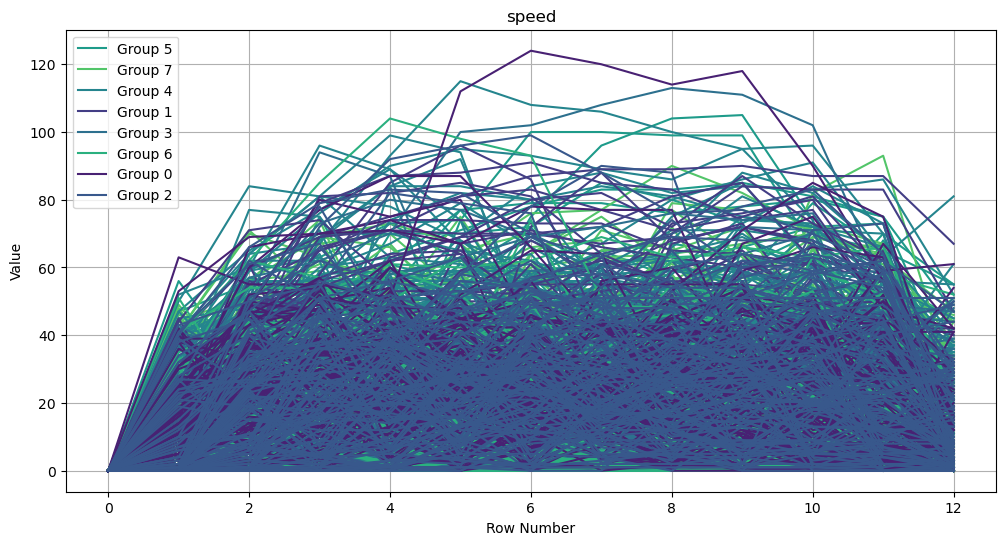

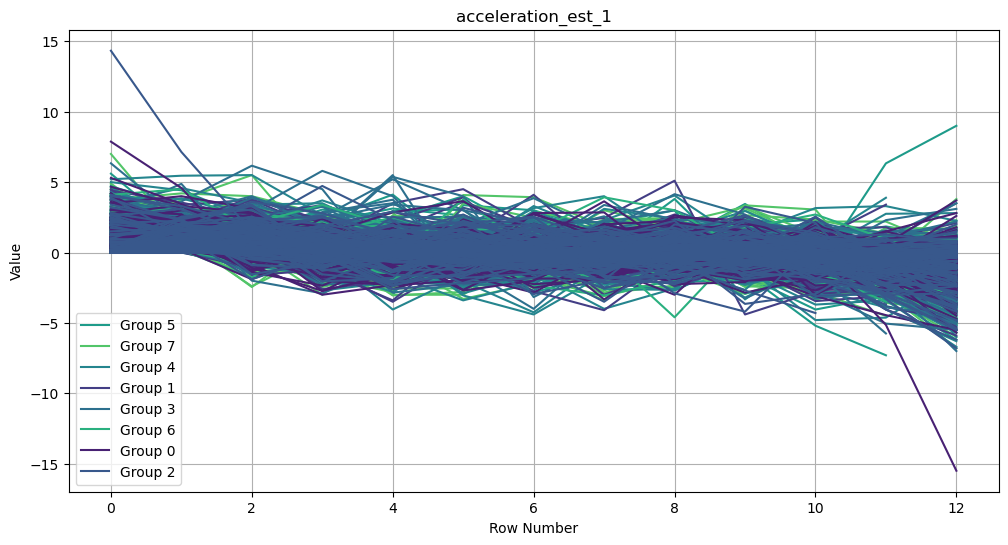

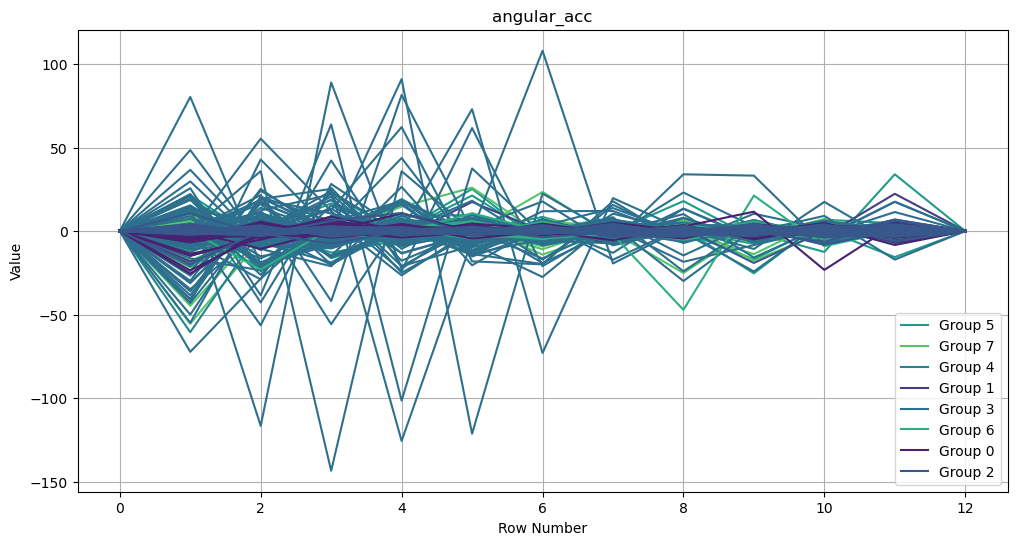

In [77]:
lst = []
for key in result['kmedoids_clusters']:
    for series in result['kmedoids_clusters'][key]:
        series['group'] = key
    lst+=result['kmedoids_clusters'][key]

plot_multi_dimensional_time_series(lst)

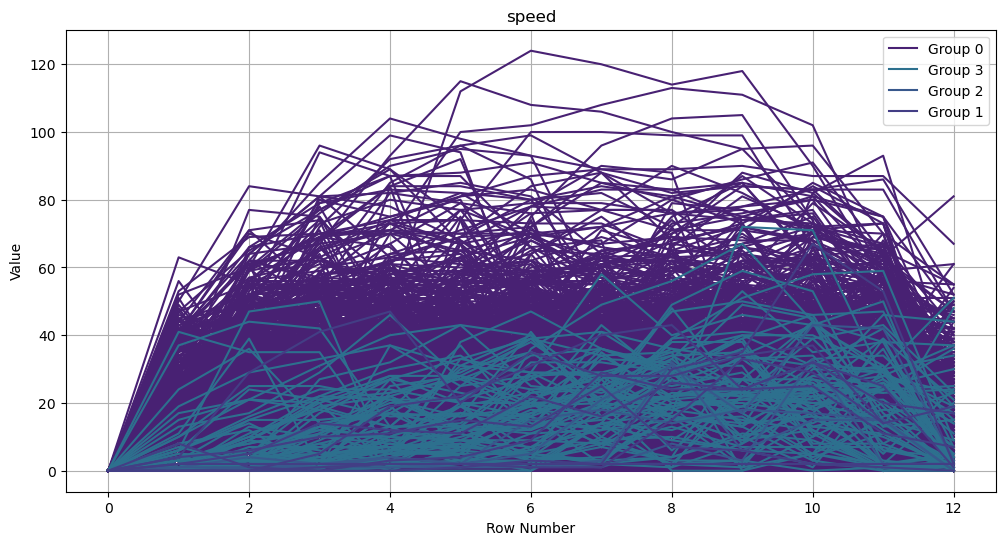

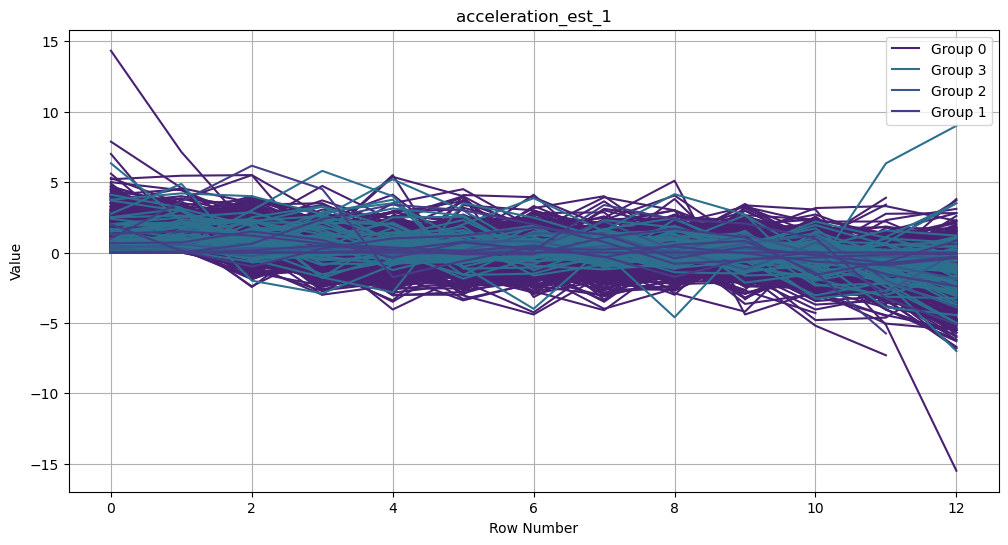

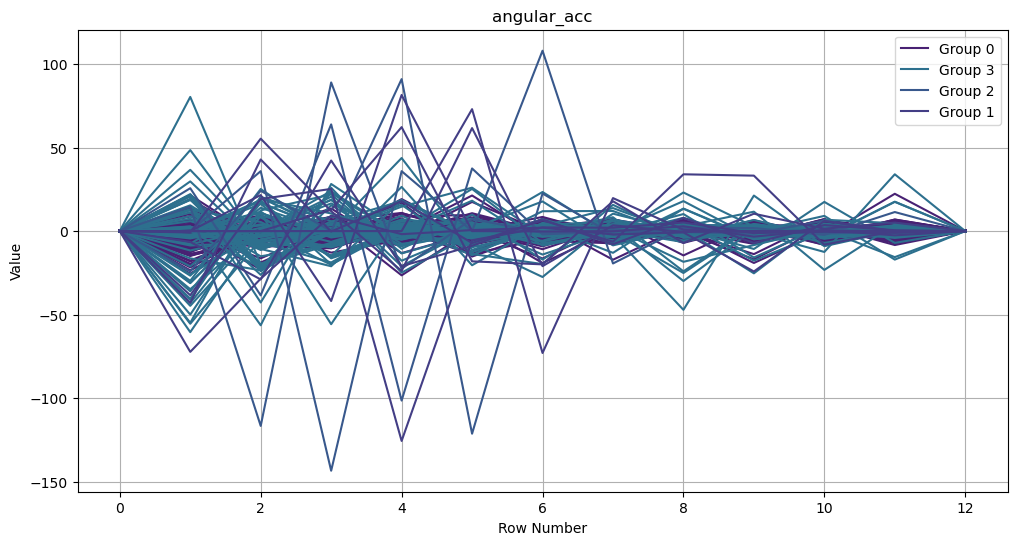

In [75]:
lst = []
for key in result['gmm_clusters']:
    for series in result['gmm_clusters'][key]:
        series['group'] = key
    lst+=result['gmm_clusters'][key]

plot_multi_dimensional_time_series(lst)

In [78]:
import folium

# Create a map object
m = folium.Map(location=[0, 0], zoom_start=2)

# Define colors for markers
colors = {2: 'green', 0: 'blue', 1: 'red', 3: 'orange', 4: 'pink', 5: 'teal', 6: 'maroon', 7: 'lavender'}

color = colors[0]
j = 0 

# Select color based on index
for key in result['dbscan_clusters']:
    j = 0 
    for series in result['dbscan_clusters'][key]:
        color = colors[key]
        j += 1
        if j < 15:
            for i, row in series.iterrows():

                lat, lon = row['latitude'], row['longitude']
                folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True, fill_color=color).add_to(m)
        else:
            break
# Display the map
m

gmm clustering only over the angular acc

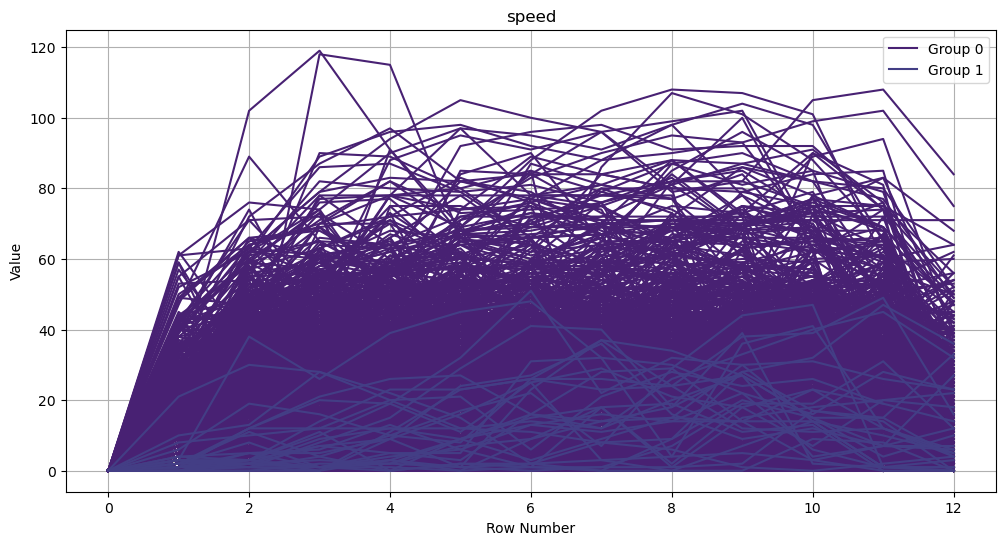

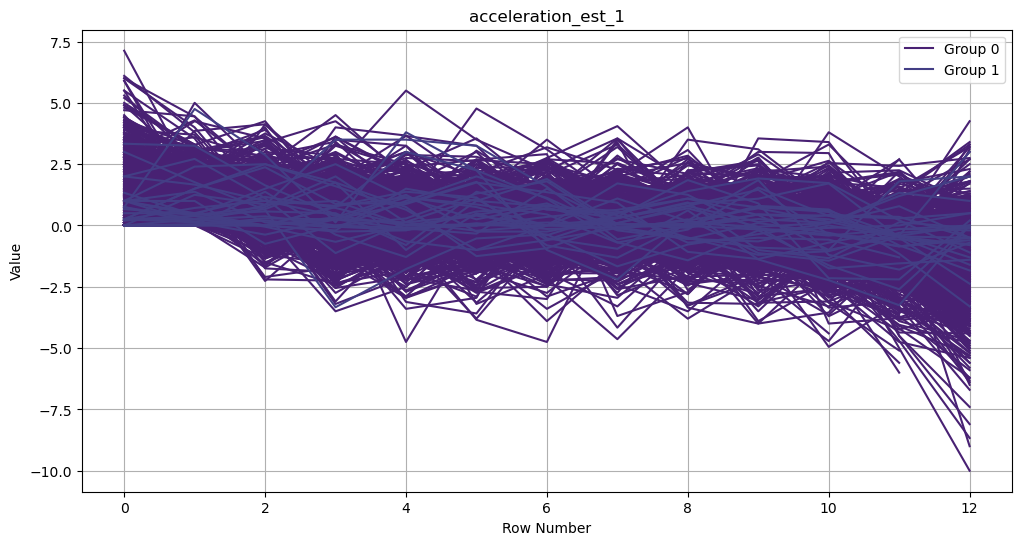

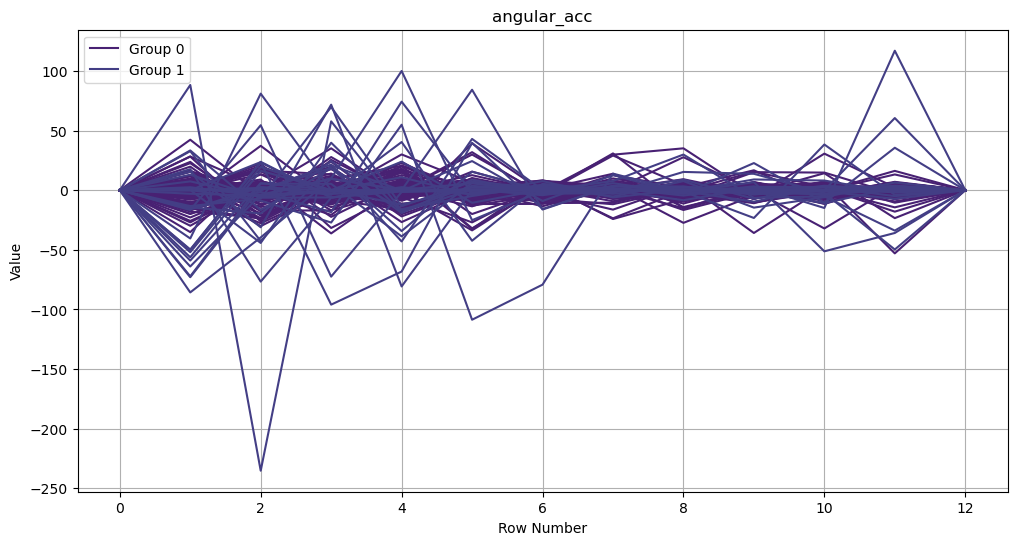

In [57]:
lst = []
for key in result['gmm_clusters']:
    for series in result['gmm_clusters'][key]:
        series['group'] = key
    lst+=result['gmm_clusters'][key]

plot_multi_dimensional_time_series(lst)

In [58]:
import folium

# Create a map object
m = folium.Map(location=[0, 0], zoom_start=2)

# Define colors for markers
colors = {2: 'green', 0: 'blue', 1: 'red', 3: 'orange', 4: 'pink', 5: 'teal', 6: 'maroon', 7: 'lavender'}

color = colors[0]
j = 0 

# Select color based on index
for key in result['gmm_clusters']:
    j = 0 
    for series in result['gmm_clusters'][key]:
        color = colors[key]
        j += 1
        if j < 15:
            for i, row in series.iterrows():

                lat, lon = row['latitude'], row['longitude']
                folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True, fill_color=color).add_to(m)
        else:
            break
# Display the map
m

In [9]:
from pprint import pprint
def get_road_name(latitude, longitude):
    url = f"https://nominatim.openstreetmap.org/reverse?format=json&lat={latitude}&lon={longitude}"
    
    try:
        response = requests.get(url)
        
        # Check if the request was successful
        if response.status_code != 200:
#             print( f"Error: Received status code {response.status_code}")
            return get_road_name(latitude, longitude)

        
        # Parse the response JSON
        data = response.json()
        return data
        if 'address' in data:
            if 'neighbourhood' in data['address']:
                return data['address']['neighbourhood']
            elif 'suburb' in data['address']:
                return data['address']['suburb']
            elif 'town' in data['address']:
                return data['address']['town']
            elif 'city' in data['address']:
                return data['address']['city']
            else:
                return "Neighborhood not found"
        else:
            return "Neighborhood not found"
    
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
    
    except ValueError as e:
        print(f"JSON decoding failed: {e}")
        
latitude = 32.108205  # Example latitude
longitude = 34.823596  # Example longitude

neighborhood_name = get_road_name(latitude, longitude)
pprint( neighborhood_name)

{'address': {'ISO3166-2-lvl4': 'IL-TA',
             'city': 'תל־אביב–יפו',
             'country': 'ישראל',
             'country_code': 'il',
             'house_number': '3ב',
             'postcode': '5259408',
             'road': 'יד המעביר',
             'state': 'מחוז תל אביב',
             'state_district': 'נפת תל אביב',
             'suburb': 'הדר-יוסף'},
 'addresstype': 'place',
 'boundingbox': ['32.1081220', '32.1082220', '34.8235660', '34.8236660'],
 'class': 'place',
 'display_name': '3ב, יד המעביר, הדר-יוסף, תל־אביב–יפו, נפת תל אביב, מחוז תל '
                 'אביב, 5259408, ישראל',
 'importance': 9.99999999995449e-06,
 'lat': '32.108172',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'http://osm.org/copyright',
 'lon': '34.823616',
 'name': '',
 'osm_id': 2079069056,
 'osm_type': 'node',
 'place_id': 187710396,
 'place_rank': 30,
 'type': 'house'}


In [14]:
neighborhood_name['type']

'house'

In [12]:
with open("/bigdata/users-home/dor/transpotation research/agg_data/env_ts/ts_with_features/(12, 50.0, 3)/cluster_dict",'rb') as handle:
    
    results = pickle.load(handle)

In [13]:
for c in results['gmm_clusters']:
    print(c , len(results['gmm_clusters'][c]))

0 2132
1 118


In [17]:
dict_1 = {}
dict_2 = {}
for key in results['gmm_clusters']:
    j = 0
    for series in results['gmm_clusters'][key]:
        if  j < 60:
            latitude = series.iloc[4]['latitude']  # Example latitude
            longitude = series.iloc[4]['longitude']   # Example longitude

            neighborhood_name = get_road_name(latitude, longitude)
            j += 1
            print(neighborhood_name['type'])
        
            

tertiary
residential
secondary
house
secondary
living_street
yes
house
apartments
tertiary
primary
secondary
secondary
residential
tertiary
tertiary
residential
tertiary
apartments
recycling
commercial
tertiary
tertiary
unclassified
house
house
residential
residential
tertiary
tertiary
primary
house
house
secondary_link
secondary
terrace
yes
tertiary
house
garden
motorway
trunk
parking
residential
house
yes
tertiary
residential
primary
tertiary
tertiary
secondary
secondary
secondary
house
parking
residential
tertiary
secondary
service
residential
garden_centre
house
primary
house
unclassified
apartments
living_street
residential
residential
residential
industrial
yes
residential
unclassified
residential
apartments
house
residential
apartments
parking
residential
residential
residential
residential
residential
residential
residential
residential
playground
tertiary
tertiary
house
residential
police
tertiary
unclassified
residential
house
residential
residential


KeyboardInterrupt: 

0 2132


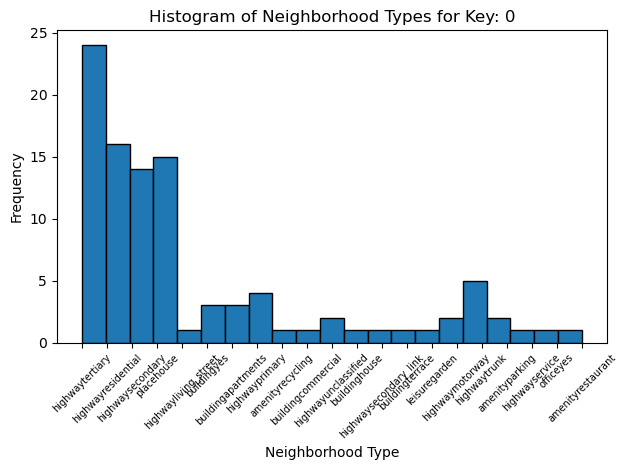

1 118


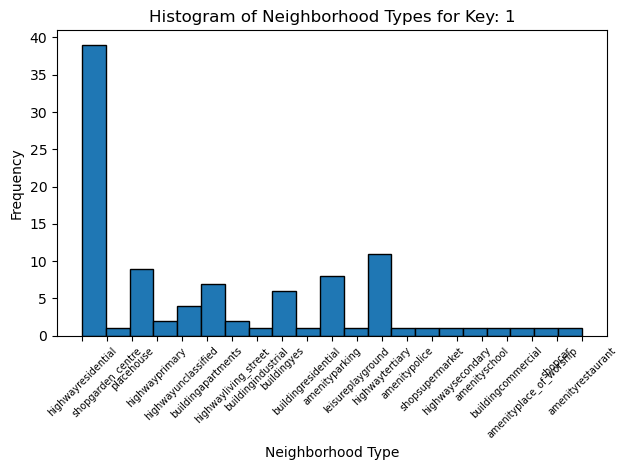

In [39]:
import matplotlib.pyplot as plt

# Initialize dictionaries to store neighborhood types
neighborhood_types = {}

# Loop through the clusters
for key in results['gmm_clusters']:
    j = 0
    types = []  # List to store 'neighborhood_name["type"]' for the current key
    print(key, len(results['gmm_clusters'][key]))
    for series in results['gmm_clusters'][key]:
        if j < 100:
            latitude = series.iloc[4]['latitude']  # Example latitude
            longitude = series.iloc[4]['longitude']  # Example longitude
            
            neighborhood_name = get_road_name(latitude, longitude)
            types.append(neighborhood_name['class']+neighborhood_name['type'])  # Collect neighborhood type
            j += 1
    
    # Store the types list in the dictionary for the current key
    neighborhood_types[key] = types
    
    # Create histogram for the current key
    plt.figure()
    plt.hist(types, bins=len(set(types)), edgecolor='black')
    plt.title(f"Histogram of Neighborhood Types for Key: {key}")
    plt.xlabel("Neighborhood Type")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45,fontsize=7)
    plt.tight_layout()
    plt.show()

# Optionally, store the histogram data in a dictionary for further processing


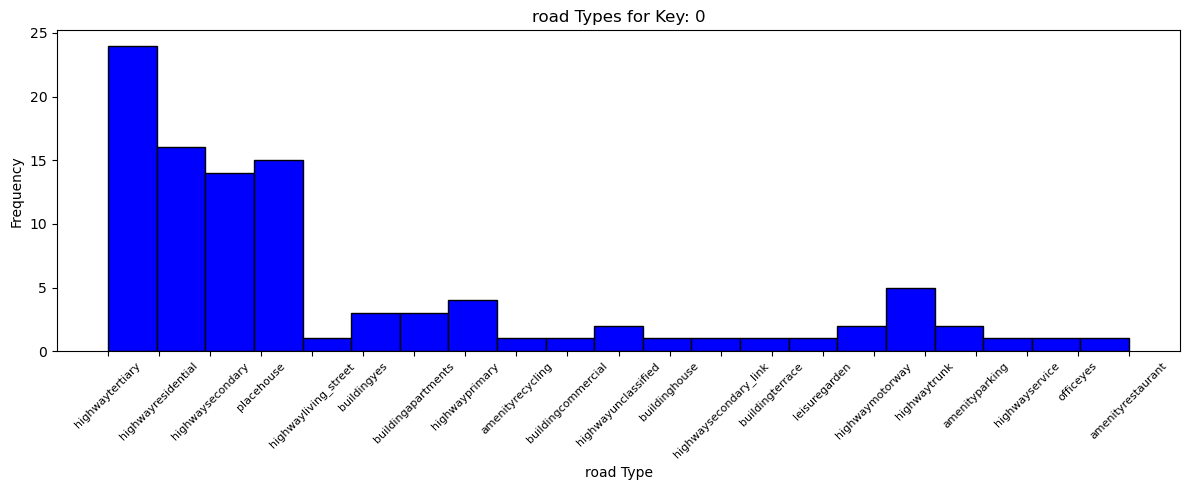

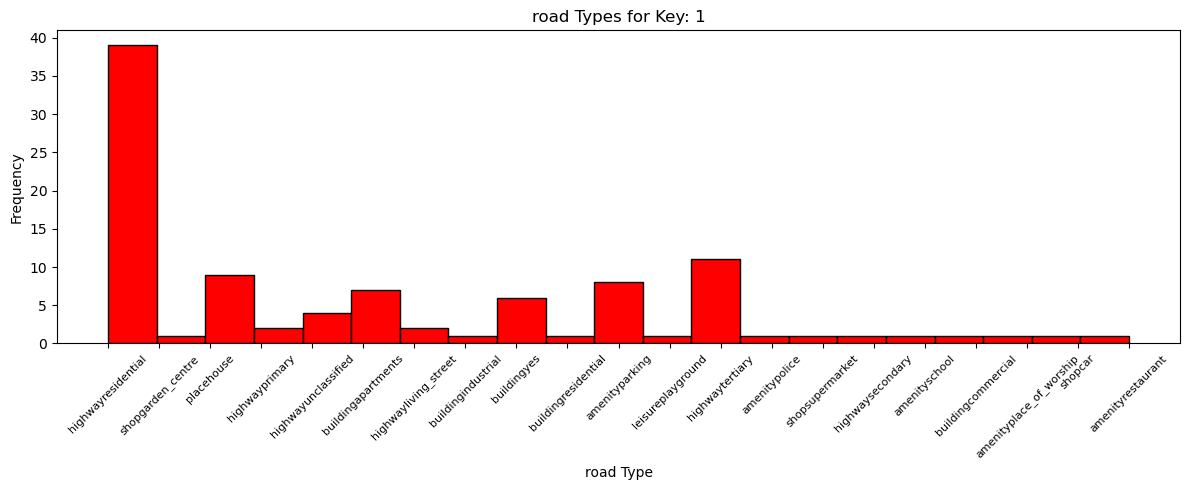

In [52]:
for key in neighborhood_types:
    
    # Create histogram for the current key
    plt.figure(figsize=(12,5))
    plt.hist(neighborhood_types[key], bins=len(set(neighborhood_types[key])), edgecolor='black',color=colors[key])
    plt.title(f"road Types for Key: {key}")
    plt.xlabel("road Type")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
plt.show()


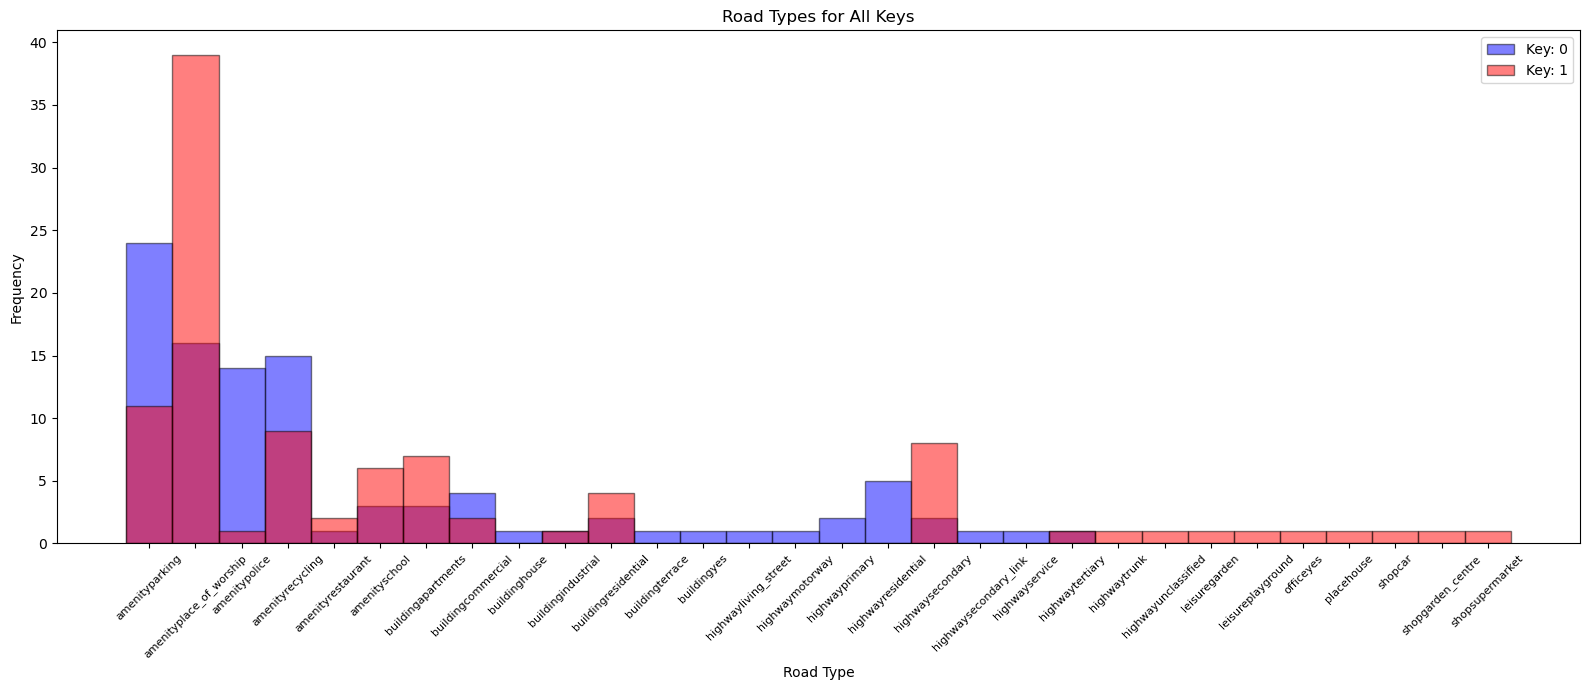

In [51]:
# Create a figure for the combined histograms
import numpy as np

# Combine all neighborhood types to determine common bin edges
all_types = neighborhood_types[0] + neighborhood_types[1]
unique_types = sorted(set(all_types))  # Get unique road types
bins = np.arange(len(unique_types) + 1) - 0.5  # Create bins that align perfectly

# Create a figure for the combined histograms
plt.figure(figsize=(16, 7))

for key in neighborhood_types:
    # Plot the histogram for each key with the same bins
    plt.hist(neighborhood_types[key], 
             bins=bins, 
             edgecolor='black', 
             color=colors[key], 
             alpha=0.5,  # Set transparency to make overlapping parts visible
             label=f"Key: {key}")

# Add title, labels, and x-tick adjustments
plt.title("Road Types for All Keys")
plt.xlabel("Road Type")
plt.ylabel("Frequency")
plt.xticks(ticks=np.arange(len(unique_types)), labels=unique_types, rotation=45, fontsize=8)  # Align the labels with the bins

# Add a legend to distinguish between the keys
plt.legend()

plt.tight_layout()
plt.show()

plt.show()


In [28]:
import requests

def get_road_name_details(road_name, city=None, country=None):
    # Base URL for Nominatim API
    url = 'https://nominatim.openstreetmap.org/search'

    # Define parameters
    params = {
        'q': road_name,           # Road name or search query
        'format': 'json',         # Request response in JSON format
        'addressdetails': 1,      # Include detailed address information
        'limit': 1                # Limit to 1 result
    }
    
    # Optionally add city and country to narrow the search
    if city:
        params['city'] = city
    if country:
        params['country'] = country

    # Make the GET request to Nominatim API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    
    result = response.json()
    if result:
        return result[0]  # Return the first result (if any)
    else:
        return None


# Example usage
road_details = get_road_name_details("יד המעביר")
if road_details:
    pprint(road_details)
else:
    print("No details found for the road.")


{'address': {'ISO3166-2-lvl4': 'IL-TA',
             'city': 'תל־אביב–יפו',
             'country': 'ישראל',
             'country_code': 'il',
             'postcode': '5259408',
             'road': 'יד המעביר',
             'state': 'מחוז תל אביב',
             'state_district': 'נפת תל אביב',
             'suburb': 'הדר-יוסף'},
 'addresstype': 'road',
 'boundingbox': ['32.1100763', '32.1122285', '34.8245465', '34.8246303'],
 'class': 'highway',
 'display_name': 'יד המעביר, הדר-יוסף, תל־אביב–יפו, נפת תל אביב, מחוז תל אביב, '
                 '5259408, ישראל',
 'importance': 0.053408333714808846,
 'lat': '32.1110906',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'http://osm.org/copyright',
 'lon': '34.8245912',
 'name': 'יד המעביר',
 'osm_id': 32786680,
 'osm_type': 'way',
 'place_id': 186435172,
 'place_rank': 26,
 'type': 'residential'}


In [38]:
import folium

# Create a map object
m = folium.Map(location=[0, 0], zoom_start=2)

# Define colors for markers
colors = {2: 'green', 0: 'blue', 1: 'red', 3: 'orange', 4: 'pink', 5: 'teal', 6: 'maroon', 7: 'lavender'}

color = colors[0]


# Select color based on index
for key in results['gmm_clusters']:
    j = 0 
    for series in results['gmm_clusters'][key]:
        color = colors[key]
        j += 1
        if j < 100:
            for i, row in series.iterrows():

                lat, lon = row['latitude'], row['longitude']
                folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True, fill_color=color).add_to(m)
        else:
            break
# Display the map
m